<a href="https://colab.research.google.com/github/joshtburdick/misc/blob/master/plog/FermatFactoringVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A variation on Fermat's factoring method

This is a variation on [Fermat's factoring method](https://en.wikipedia.org/wiki/Fermat%27s_factorization_method),
which tries to write a number $N$ as a difference of squares $N = a^2 - b^2$.

However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes $m = \prod p_i$.
It's not obvious that trying to solve these separately makes for an easier problem.

Here, we *only* ask ask the question:

For a given set of small primes $p_i$, suppose we wish to factor $N$ (which is less than $m = \prod p_i$). Suppose we find $a$ and $b$ such that, for all $i$,

$a^2 - b^2 \equiv N   ({\rm mod} p_i)$

How often is it the case that any of $a+b$, $a-b$, or $b-a$ shares a
common factor (other than 1) with $N$?

(As a quick check, pasting that into "Generate"; here's what I get.)




In [27]:
# prompt: This is a variation on Fermat's factoring method. It tries to write a number  𝑁  as a difference of squares  𝑁=𝑎2−𝑏2 .
# However, here, rather than requiring this to be exact, we only require to be true modulo a product of small primes  𝑚=∏𝑝𝑖 . It's not obvious that trying to solve these separately makes for an easier problem.
# Here, we only ask ask the question:
# For a given set of small primes  𝑝𝑖 , suppose we wish to factor  𝑁  (which is less than  𝑚=∏𝑝𝑖 ). Suppose we find  𝑎  and  𝑏  such that, for all  𝑖 ,
# 𝑎2−𝑏2≅𝑁(mod𝑝𝑖)
# How often is it the case that any of  𝑎+𝑏 ,  𝑎−𝑏 , or  𝑏−𝑎  shares a common factor (other than 1) with  𝑁 ?

def has_common_factor(N, a, b):
  """Checks if a+b, a-b, or b-a share a common factor with N.

  Args:
    N: The number to factor.
    a: One of the integers in the difference of squares.
    b: The other integer in the difference of squares.

  Returns:
    True if there is a common factor, False otherwise.
  """
  import math

  if math.gcd(abs(a + b), N) > 1:
    return True
  if math.gcd(abs(a - b), N) > 1:
    return True
  if math.gcd(abs(b - a), N) > 1:
    return True
  return False

In [28]:
import math
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas
import random

In [29]:
# prompt: Get the first few hundred prime numbers. Feel free to use whatever Python libraries simplify this.

!pip install sympy

from sympy import primerange

primes = list(primerange(2, 1230)) # Get primes up to roughly the first 2000, as the 200th prime is 1223.
primes

# how many primes is this?
len(primes)
# ...close enough

201

## Revised attempt at this
We try to compute the possible values of `a` and `b` faster, using a table.

First, for a given set of primes, we make a table of the
difference of squares, and the various differences between `a` and `b`.

In [30]:
def diff_of_squares_table(primes):
  """Constructs tables of difference of squares.
  Args:
    primes: A list of prime numbers.
  Returns:
    An array with columns:
      0: a^2 - b^2
      1: a + b
      2: a - b
      3: b - a
      4: -a - b
  """
  m = math.prod(primes)
  # First, compute a and b, as square tables containing just 0..(m-1),
  # either on rows or columns. (We then just flatten them to vectors.)
  i = np.arange(m)
  a = i.reshape([m,-1])
  b = i.reshape([-1,m])
  return np.stack([
      a**2 - b**2,
      a+b, a-b, b-a, -a-b
  ], axis=0).reshape([5,-1]).T % m

x = diff_of_squares_table([3,5])
x[:,0]

array([ 0, 14, 11,  6, 14,  5,  9, 11, 11,  9,  5, 14,  6, 11, 14,  1,  0,
       12,  7,  0,  6, 10, 12, 12, 10,  6,  0,  7, 12,  0,  4,  3,  0, 10,
        3,  9, 13,  0,  0, 13,  9,  3, 10,  0,  3,  9,  8,  5,  0,  8, 14,
        3,  5,  5,  3, 14,  8,  0,  5,  8,  1,  0, 12,  7,  0,  6, 10, 12,
       12, 10,  6,  0,  7, 12,  0, 10,  9,  6,  1,  9,  0,  4,  6,  6,  4,
        0,  9,  1,  6,  9,  6,  5,  2, 12,  5, 11,  0,  2,  2,  0, 11,  5,
       12,  2,  5,  4,  3,  0, 10,  3,  9, 13,  0,  0, 13,  9,  3, 10,  0,
        3,  4,  3,  0, 10,  3,  9, 13,  0,  0, 13,  9,  3, 10,  0,  3,  6,
        5,  2, 12,  5, 11,  0,  2,  2,  0, 11,  5, 12,  2,  5, 10,  9,  6,
        1,  9,  0,  4,  6,  6,  4,  0,  9,  1,  6,  9,  1,  0, 12,  7,  0,
        6, 10, 12, 12, 10,  6,  0,  7, 12,  0,  9,  8,  5,  0,  8, 14,  3,
        5,  5,  3, 14,  8,  0,  5,  8,  4,  3,  0, 10,  3,  9, 13,  0,  0,
       13,  9,  3, 10,  0,  3,  1,  0, 12,  7,  0,  6, 10, 12, 12, 10,  6,
        0,  7, 12,  0])

In [31]:
primes = [3,5,7,11]
s = diff_of_squares_table(primes)
print(s.shape)
s

(1334025, 5)


array([[   0,    0,    0,    0,    0],
       [1154,    1, 1154,    1, 1154],
       [1151,    2, 1153,    2, 1153],
       ...,
       [1147, 1151,    2, 1153,    4],
       [1152, 1152,    1, 1154,    3],
       [   0, 1153,    0,    0,    2]])

In [32]:
print(13*17)
r = s[ s[:,0]==13*17 , : ]
print(r.shape)
print(r)

221
(480, 5)
[[221 289 884 271 866]
 [221 499 674 481 656]
 [221 674 499 656 481]
 ...
 [221 481 656 499 674]
 [221 656 481 674 499]
 [221 866 271 884 289]]


In [33]:
# prompt: given a numpy array a and an integer n, compute the GCD of everything in it with n

import numpy as np
def array_gcd(a, n):
  """Computes the GCD of each element in a NumPy array with an integer n.

  Args:
    a: A NumPy array of integers.
    n: An integer.

  Returns:
    A NumPy array of the same shape as a, where each element is the GCD of the
    corresponding element in a and n.
  """
  return np.gcd(a, n)

# Example usage:
# a = np.array([12, 18, 24])
# n = 6
# result = array_gcd(a, n)
# print(result) # Output: [6 6 6]

(This works, but since we know the actual factors, we can do this more simply.)

In [34]:
x = (r % 13 > 0) ^ (r % 17 > 0)
sum(x)

array([ 0, 59, 59, 59, 59])

The first column makes sense. I'm not sure why the others are the same...

In [35]:
x1 = np.sum(x[:,1:5], axis=1)
print(x1.shape)
np.unique(x1, return_counts=True)

(480,)


(array([0, 1, 2]), array([284, 156,  40]))

In [36]:
2*4*6*10

480

In [37]:
13*17

221

## 2nd(ish) try: using more variations on $a+b$ and $a-b$

Previously, we basically tried adding together every possibility of $\pm a + \pm b$. However, it seems sort of like, if we consider $a \equiv a_i \mathrm{mod} p_i$, then note that $(+a_i)^2 \equiv (-a_i)^2 \mathrm{mod} p_i$. So we should be able to "flip" any "component" $a_i$ or $b_i$, and still have a solution to $N = a^2 - b^2$. (Also note that $-a \equiv -a_i \mathrm{mod} p_i$, and so is like "flipping" all of the components.)

The question is, how many of these (if any) numbers have a nontrivial shared factor with $N$? To answer this, we modify the previous table a bit:


In [38]:
def mod_table(primes):
  """Constructs a table of what the numbers are modulo the primes.
  Args:
    primes: A list of prime numbers.
  Returns:
    An array with, for row i, the value of i mod each of the primes.
  """
  m = math.prod(primes)
  i = np.arange(m)
  return i.reshape([m,-1]) % primes

mod_table([5,7]).T

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
        1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]])

In [39]:
def diff_of_squares_table(primes):
  """Constructs tables of difference of squares.
  Args:
    primes: A list of prime numbers.
  Returns:
    a table with three columns:
      0: a^2 - b^2
      1: a
      2: b
  """
  m = math.prod(primes)
  # First, compute a and b, as square tables containing just 0..(m-1),
  # either on rows or columns. (We later flatten them to vectors.)
  i = np.arange(m)
  z = np.zeros((m,m))
  a = i.reshape([m,-1])
  b = i.reshape([-1,m])
  return np.stack([
      a**2 - b**2, z+a, z+b
  ], axis=0).reshape([3,-1]).T % m

diff_of_squares_table([5,7])

array([[ 0.,  0.,  0.],
       [34.,  0.,  1.],
       [31.,  0.,  2.],
       ...,
       [27., 34., 32.],
       [32., 34., 33.],
       [ 0., 34., 34.]])


## Original attempt

(Below is my first attempt at this, which uses sampling, and is probably slower.)

First, for a given set of primes, we find the members of the multiplicative group.



In [40]:
# prompt: Given a list of primes whose product is m, get the numbers in 1..m which are members of the multiplicative group.

def multiplicative_group_members(primes):
  """Gets the numbers in 1..m which are members of the multiplicative group.

  Args:
    primes: A list of prime numbers.

  Returns:
    A list of numbers in 1..m that are members of the multiplicative group,
    where m is the product of the primes.
  """
  m = math.prod(primes)
  members = []
  for num in range(1, m + 1):
    is_member = True
    for p in primes:
      if math.gcd(num, p) != 1:
        is_member = False
        break
    if is_member:
      members.append(num)
  return members

# Example usage:
# m_members = multiplicative_group_members(primes)
# print(m_members)

(This works. However, it might be faster to either check if any `p` in `primes` divides `num`, or check `math.gcd(num, m)!=1`. Admittedly, I'm not sure which of these would be faster.)

In [41]:
len(multiplicative_group_members(primes))

480

In [46]:
# prompt: Write a function which is given a list `p` of primes, and first computes their product, `m`, and the elements of 1..m which form a multiplicative group.
# It should then sample numbers N, which are a product of exactly two primes, and use sampling to find pairs `a` and `b` such that a^2-b^2 = N (mod m).
# For each of these, it should then check whether N and _any_ of a+b, a-b, or b-a share a common factor.
# It should expect "number of samples" as an argument. It should return a list of, for each sample:
# - N
# - a, b

def solve_and_check_common_factors(p, num_samples):
    """
    Samples numbers N (product of two primes) and finds pairs (a, b)
    such that a^2 - b^2 = N (mod m), then checks for common factors.

    Args:
        p: A list of prime numbers.
        num_samples: The number of samples to take.

    Returns:
        A list of tuples, where each tuple contains (N, (a, b)).
    """
    m = math.prod(p)
    m_members = multiplicative_group_members(p)

    results = []

    # Create a list of possible two-prime products within a reasonable range
    possible_Ns = []
    primes1 = [p for p in primes if p!=2 and p<math.sqrt(m+1)]
    for i in range(len(primes)):
        for j in range(i, len(primes)):
            n = primes[i] * primes[j]
            if n < m: # Ensure N is less than m for modulo operations
                possible_Ns.append(n)

    for _ in range(num_samples):
        # Randomly sample an N which is a product of two primes
        N = random.choice(possible_Ns)
        if N >= m:
          continue
        num_congruent = 0
        num_with_common_factor = 0
        for _ in range(100000): # Try random pairs of a and b
            a = random.choice(m_members)
            b = random.choice(m_members)
            # Check if a^2 - b^2 = N (mod m)
            if (a**2 - b**2) % m == N % m:
              num_congruent += 1
              if has_common_factor(N, a, b):
                num_with_common_factor += 1
        results.append({"m": m, "N": N,
                        "num_congruent": num_congruent,
                        "num_with_common_factor": num_with_common_factor,
                        "p_common_factor": num_with_common_factor / num_congruent})


    return results

# Example usage:
p = [79,83] # [59,71] # [37,59]
sample_results = solve_and_check_common_factors(p, 100)
for x in sample_results:
  print(x)

{'m': 6557, 'N': 25, 'num_congruent': 17, 'num_with_common_factor': 10, 'p_common_factor': 0.5882352941176471}
{'m': 6557, 'N': 77, 'num_congruent': 13, 'num_with_common_factor': 6, 'p_common_factor': 0.46153846153846156}
{'m': 6557, 'N': 55, 'num_congruent': 16, 'num_with_common_factor': 9, 'p_common_factor': 0.5625}
{'m': 6557, 'N': 33, 'num_congruent': 11, 'num_with_common_factor': 7, 'p_common_factor': 0.6363636363636364}
{'m': 6557, 'N': 15, 'num_congruent': 8, 'num_with_common_factor': 8, 'p_common_factor': 1.0}
{'m': 6557, 'N': 49, 'num_congruent': 8, 'num_with_common_factor': 2, 'p_common_factor': 0.25}
{'m': 6557, 'N': 21, 'num_congruent': 12, 'num_with_common_factor': 11, 'p_common_factor': 0.9166666666666666}
{'m': 6557, 'N': 121, 'num_congruent': 14, 'num_with_common_factor': 3, 'p_common_factor': 0.21428571428571427}
{'m': 6557, 'N': 25, 'num_congruent': 15, 'num_with_common_factor': 4, 'p_common_factor': 0.26666666666666666}
{'m': 6557, 'N': 21, 'num_congruent': 14, 'num_

We now plot how often a common factor is found.

<Axes: xlabel='N', ylabel='p_common_factor'>

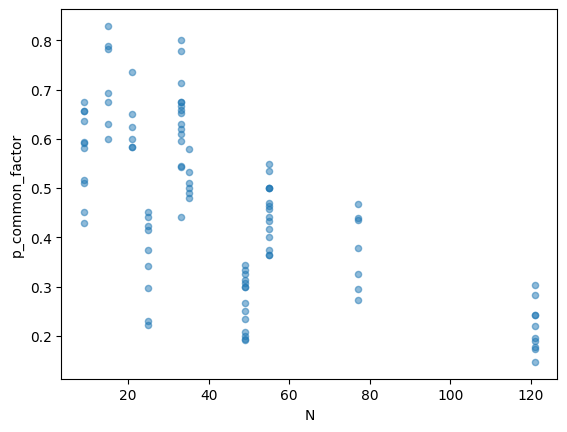

In [43]:
sample_results = pandas.DataFrame(sample_results)
sample_results.plot.scatter(x='N', y='p_common_factor', alpha=0.5)

It looks like, if $a$ and $b$ are found which satisfy the congruence, there's some chance that $a+b$, $a-b$, or $b-a$ will share a factor with $N$.

However, it's presumably not easy to find such $a$ and $b$.